# Wind Power Generation Forecasting

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [3]:
location1=pd.read_csv(r"C:\Users\Ashwin\Downloads\archive (5)\Location2.csv")
location2=pd.read_csv(r"C:\Users\Ashwin\Downloads\archive (5)\Location1.csv")
location3=pd.read_csv(r"C:\Users\Ashwin\Downloads\archive (5)\Location3.csv")
location4=pd.read_csv(r"C:\Users\Ashwin\Downloads\archive (5)\Location4.csv")

In [4]:
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419


In [5]:
location1['Location']='Location1'
location2['Location']='Location2'
location3['Location']='Location3'
location4['Location']='Location4'
merged_data=pd.concat([location1,location2,location3,location4],ignore_index=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,Location1
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,Location1
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,Location1
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,Location1
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,Location1


In [6]:
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,Location1
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,Location1
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,Location1
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,Location1
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,Location1


In [7]:
#save the merged dataset to a new csv file
merged_data.to_csv('merge_locations.csv',index=False)

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [9]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [10]:
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [11]:
# Encoding the categorical variables
merged_data=pd.get_dummies(merged_data,columns=['Location'],drop_first=True)

In [12]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [13]:
#No Time Column - Because it doesn't talk about power prediction. It only justifies about the time when it happened.
merged_data.drop('Time',axis=1,inplace=True)

In [14]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574,False,False,False
1,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535,False,False,False
2,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497,False,False,False
3,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458,False,False,False
4,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419,False,False,False


Week-2: EDA

In [15]:
# Let's extract the numerical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [16]:
merged_data.shape

(175200, 12)

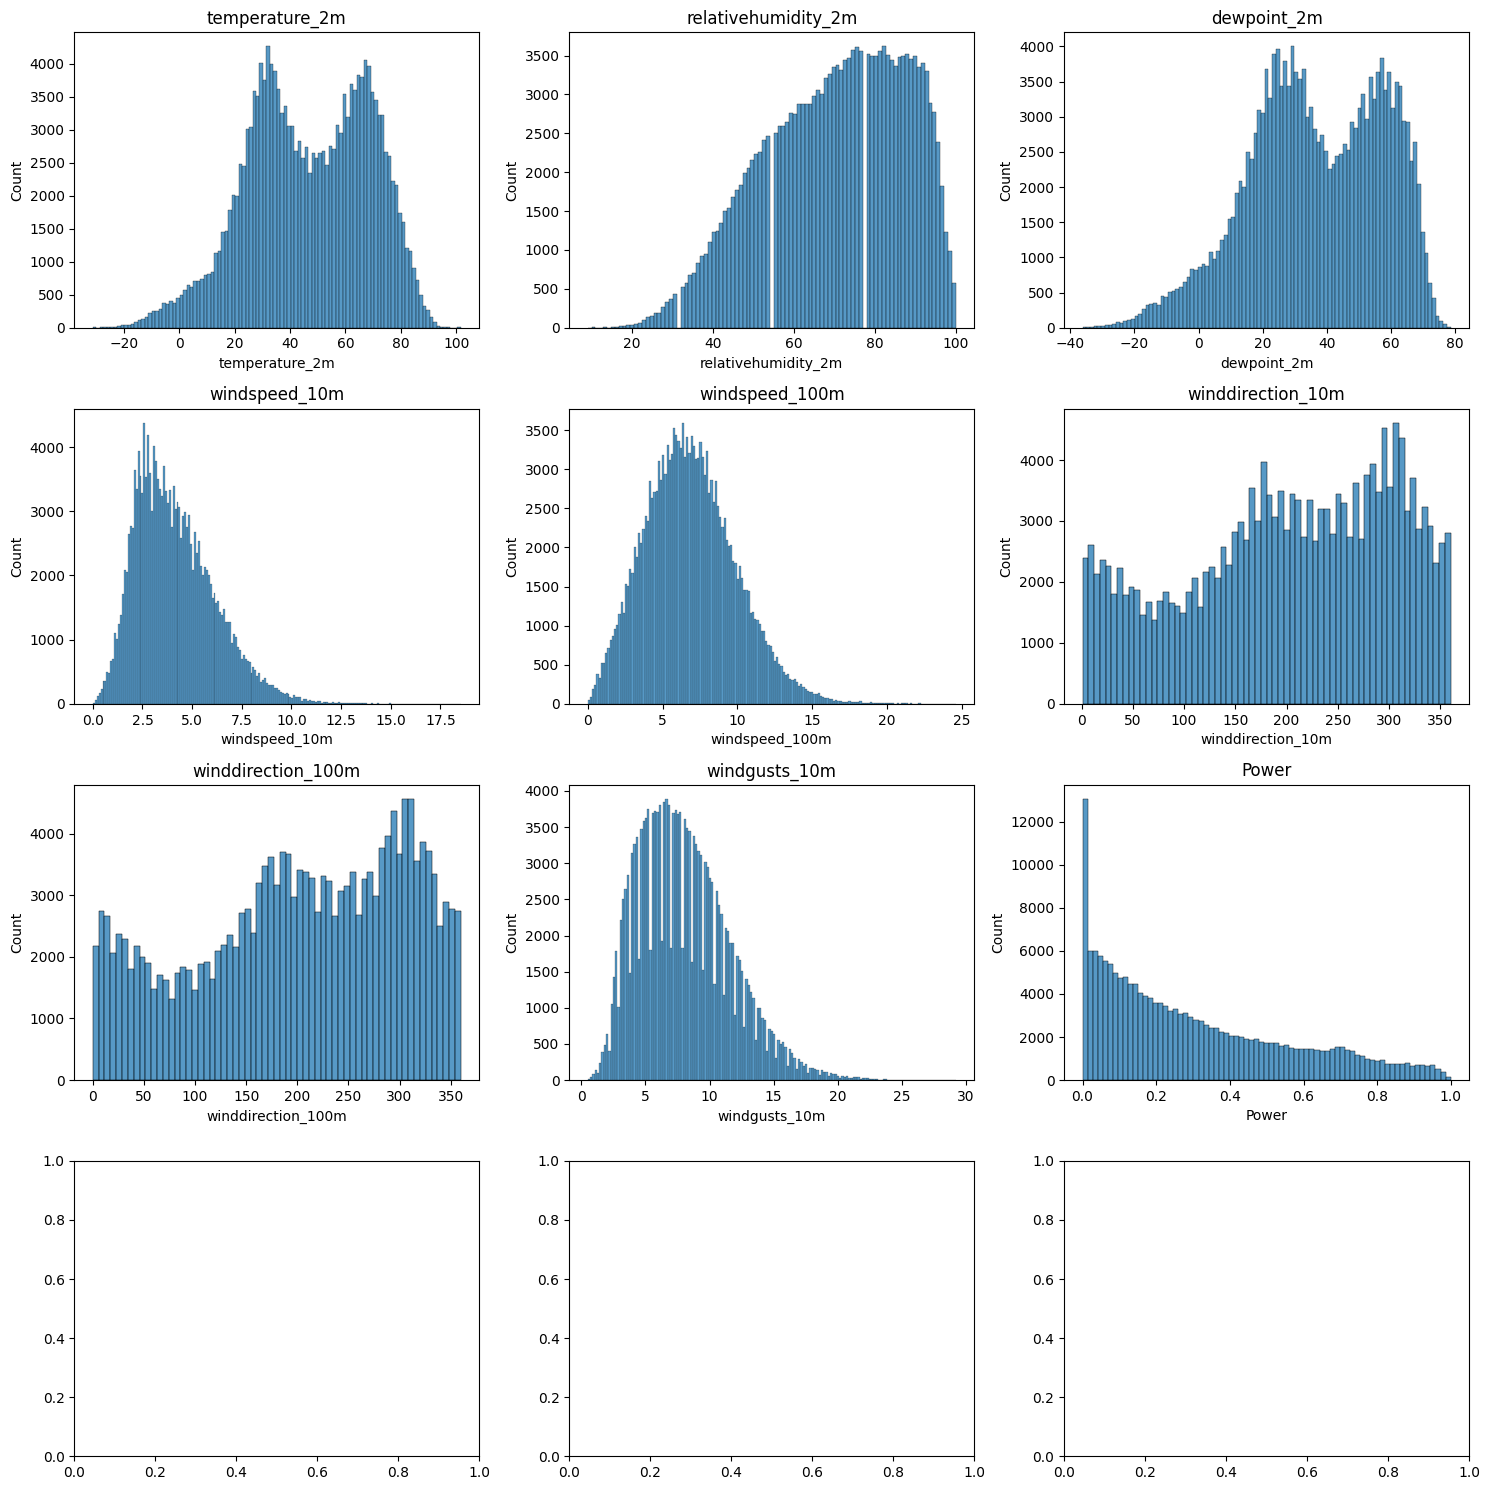

In [17]:
# let's plot using subplots for the data distribution of each numerical cols
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() # we have 2d array and for that we need indices, rows/cols, so converting into 1d array
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

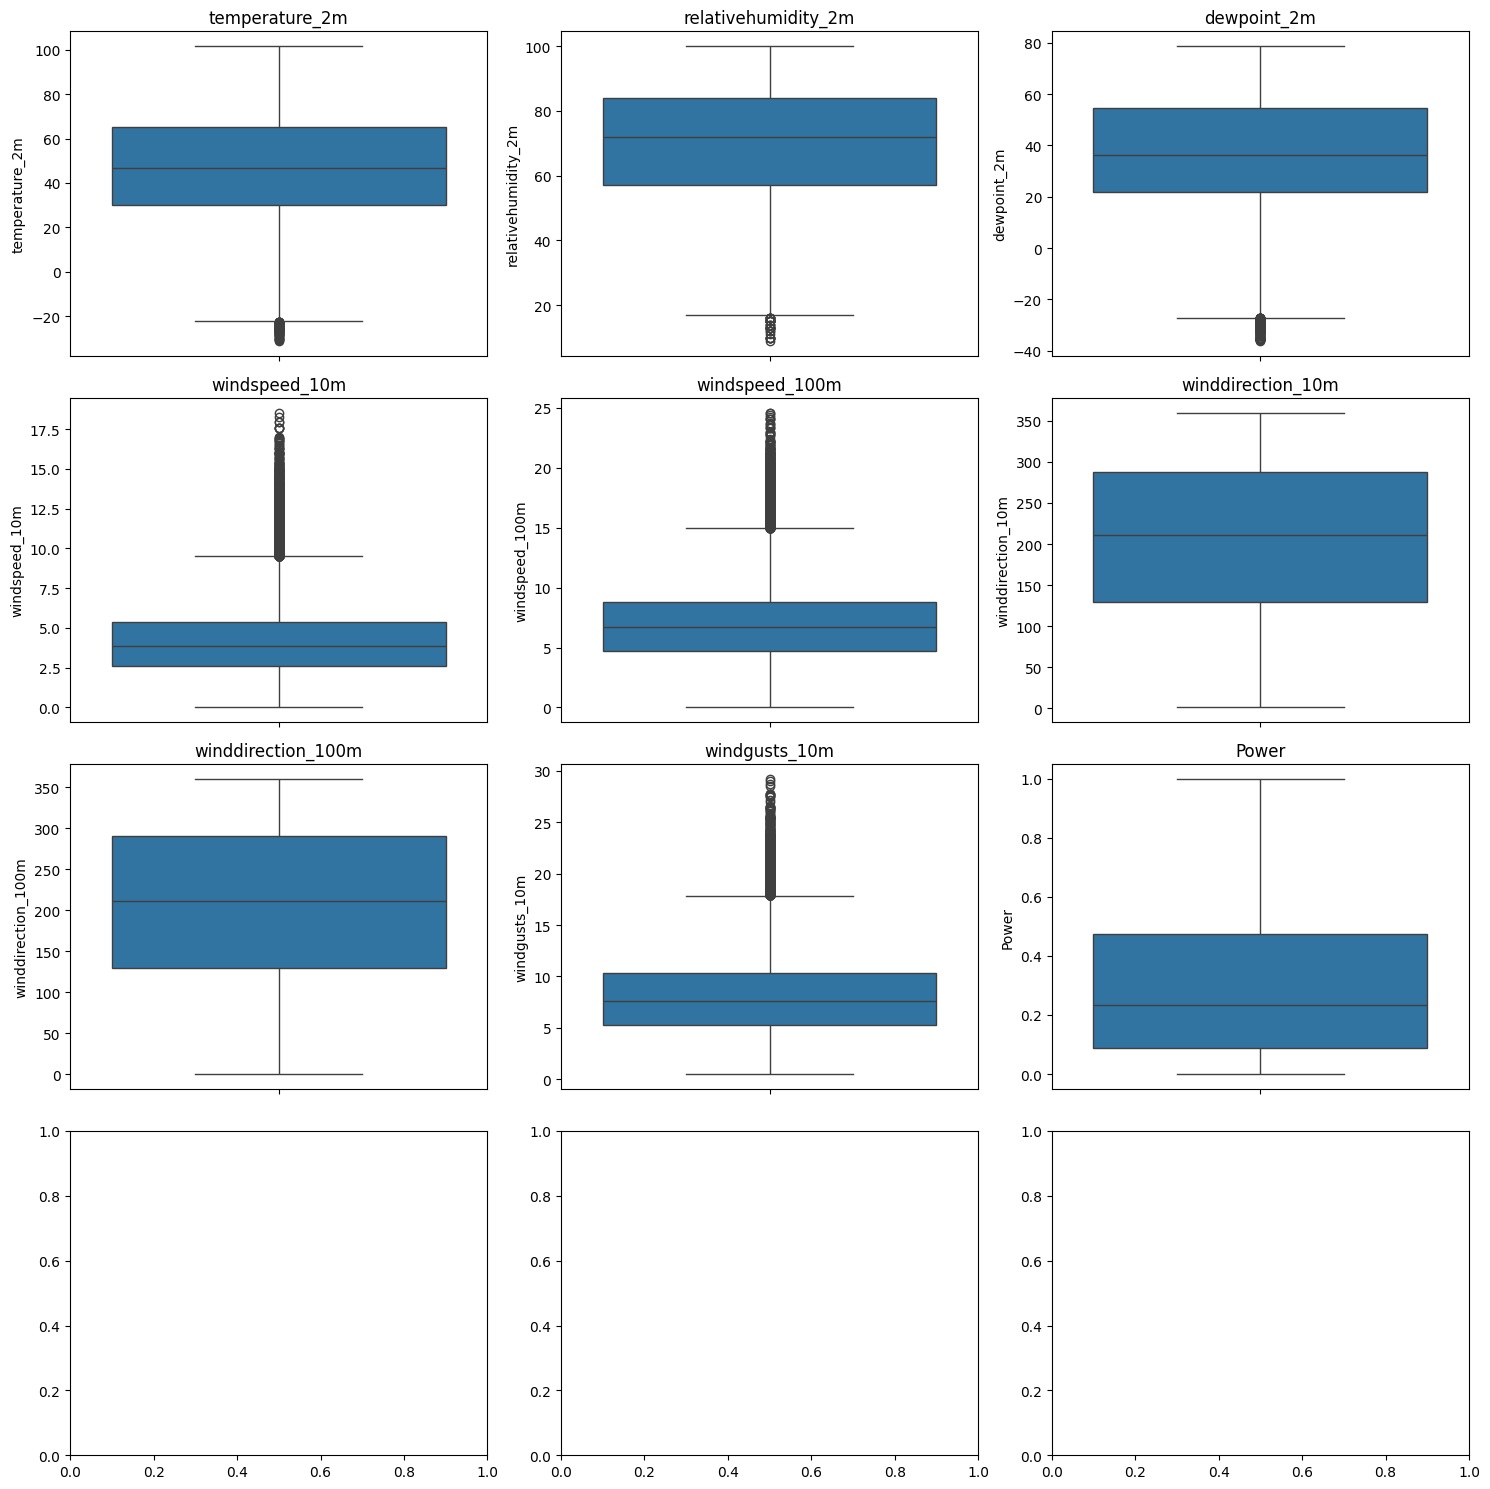

In [18]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

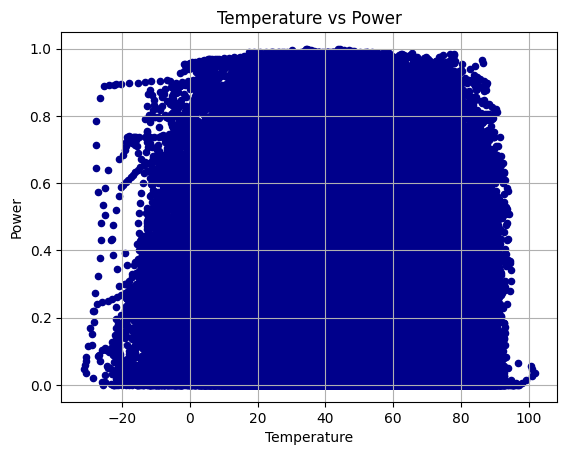

In [19]:
# let's use scatter plot to see the relationship between power & temp
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

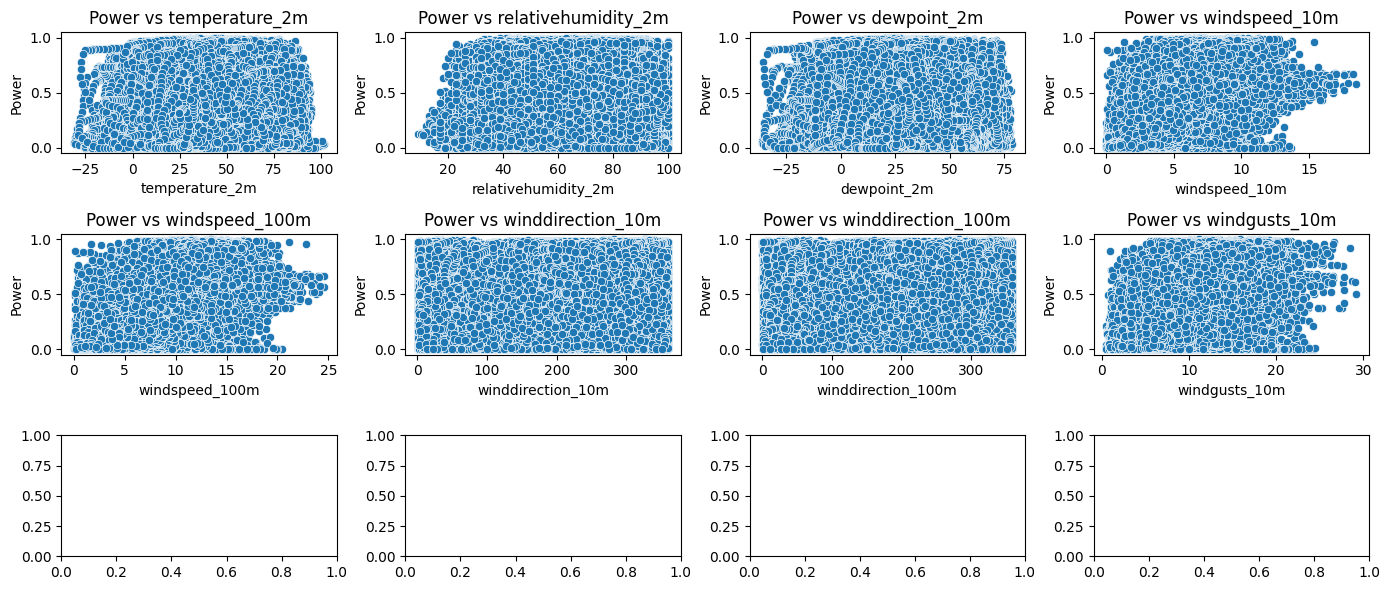

In [20]:
# Creating multiple plots to see the relation btw different cols and power
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

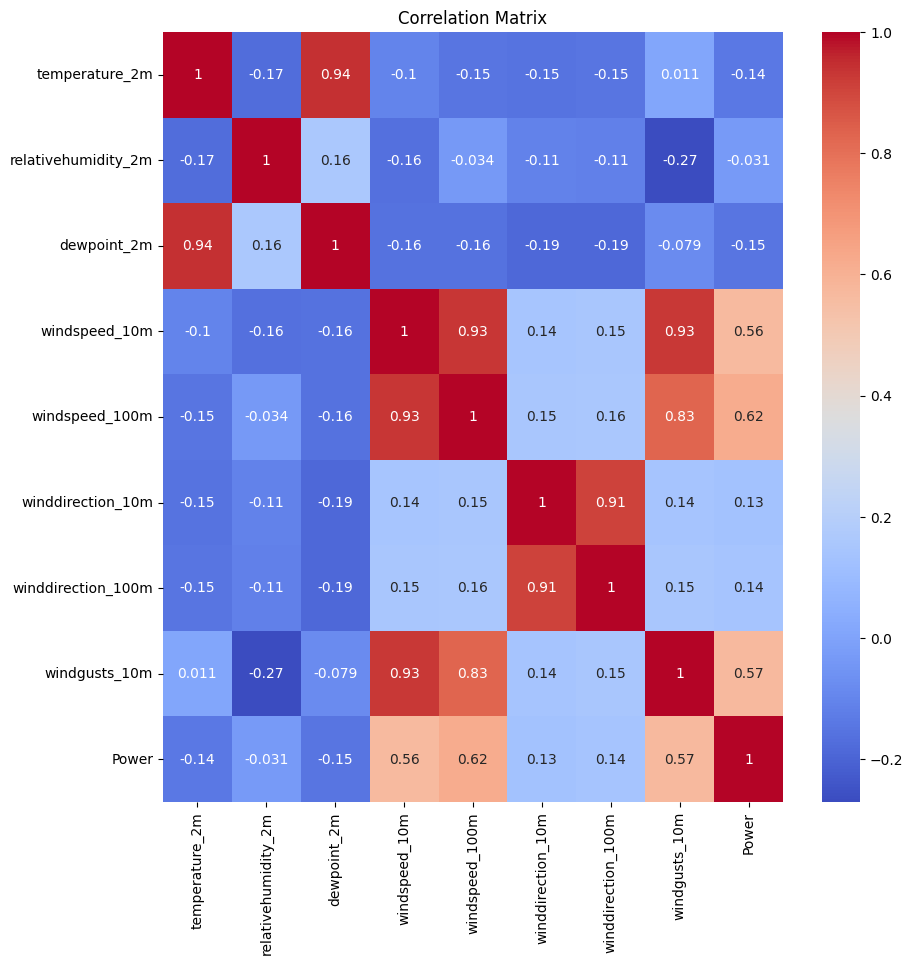

In [21]:
# Check the correlation between the cols and power
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
